# Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
!pip install -q datasist
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import joblib
sns.set(rc={'figure.figsize':(15,10)})

In [2]:
df = pd.read_csv('../input/credit-card-customers/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

No missing value

# Categories data

In [5]:
cat_cols = ['Gender','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

In [6]:
imputer = SimpleImputer(strategy='most_frequent', missing_values='Unknown')

df[cat_cols] = imputer.fit_transform(df[cat_cols])

In [7]:
for i in cat_cols:
  print(i)
  print(df[i].unique())
  print('-'*25)

Gender
['M' 'F']
-------------------------
Education_Level
['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
-------------------------
Marital_Status
['Married' 'Single' 'Divorced']
-------------------------
Income_Category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
-------------------------
Card_Category
['Blue' 'Gold' 'Silver' 'Platinum']
-------------------------


In [8]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Numerical data

In [9]:
num_cols = ['Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
            'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Dependent_count',
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
            'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [10]:
indces = detect_outliers(df, n=0, features=num_cols)

In [11]:
for i in num_cols:
    indecs = detect_outliers(df, n=0, features=[i])
    df.loc[indecs, i] = df[i].median()

In [12]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

# Correlation between numerical data

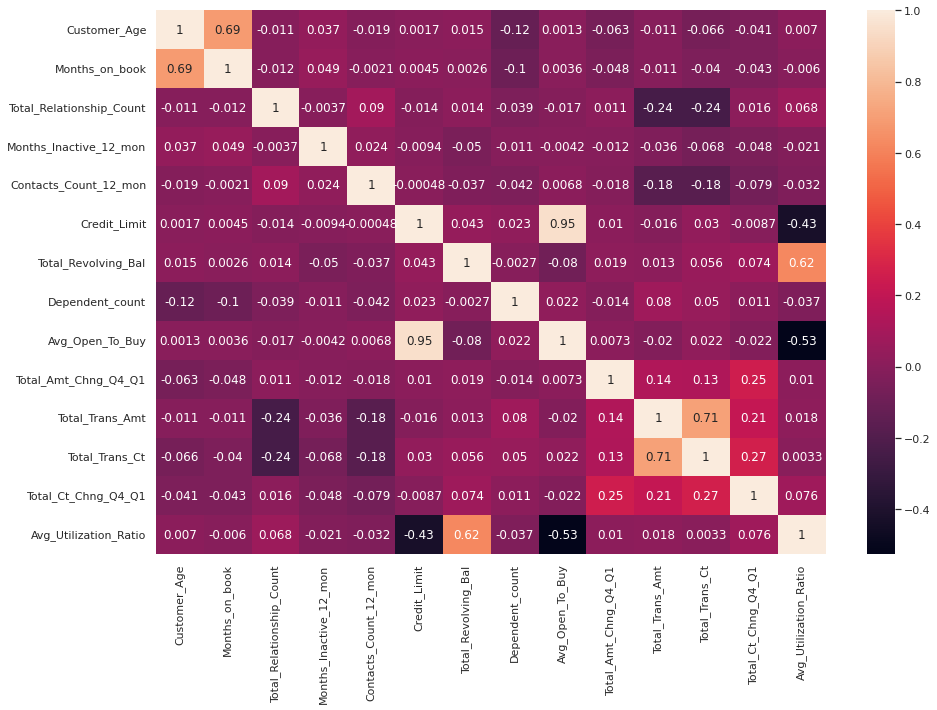

In [13]:
sns.heatmap(df[num_cols].corr(), annot=True);

- Customer_Age and Months_on_book are highly positively correlated.
- Credit_Limit and Avg_Open_To_Buy are highly positively correlated.
- ToalTrans_Ct and Total_Trans_Amt are positively correlated.
- Credit_Limit and Avg_Utilization_Ratio are negatively correlated.
- Avg_Open_To_Buy and Avg_Utilization_Ratio are negatively correlated.

# split into x and y

In [14]:
x = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

In [15]:
# change y to be just one column contain of 1 if the preson leave or 0 if no
y = y.apply(lambda str: 0 if str == 'Existing Customer' else 1)

## Split data

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
x_test.shape

(2026, 29)

In [25]:
x_train.shape

(8101, 29)

# Over sample the data

In [26]:
ros = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = ros.fit_resample(x_train, y_train)

In [27]:
X_resampled.shape

(10198, 29)

# Scale the data

In [28]:
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
x_test = scaler.transform(x_test)

# Hyperparameter tuning

In [29]:
model = XGBClassifier(use_label_encoder=False)

In [30]:
params = [
    {'booster':['gbtree', 'dart'], 'n_estimators':[100, 150, 200, 250], 'max_depth':[5, 6, 7]}
]

In [31]:
GRD_search = GridSearchCV(estimator=model,param_grid=params, scoring='f1', n_jobs=-1, cv=10)

In [32]:
GRD_search.fit(X_resampled,y_resampled)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [33]:
GRD_search.best_params_

{'booster': 'gbtree', 'max_depth': 5, 'n_estimators': 200}

In [34]:
GRD_search.best_score_

0.964753507760993

In [35]:
model = GRD_search.best_estimator_
model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [36]:
print("score in training data : ",model.score(X_resampled, y_resampled))
y_pred = model.predict(x_test)
print("score in testing data : ",accuracy_score(y_test, y_pred))
print("f1 score : ", f1_score(y_test, y_pred))

score in training data :  1.0
score in testing data :  0.9536031589338598
f1 score :  0.8483870967741937


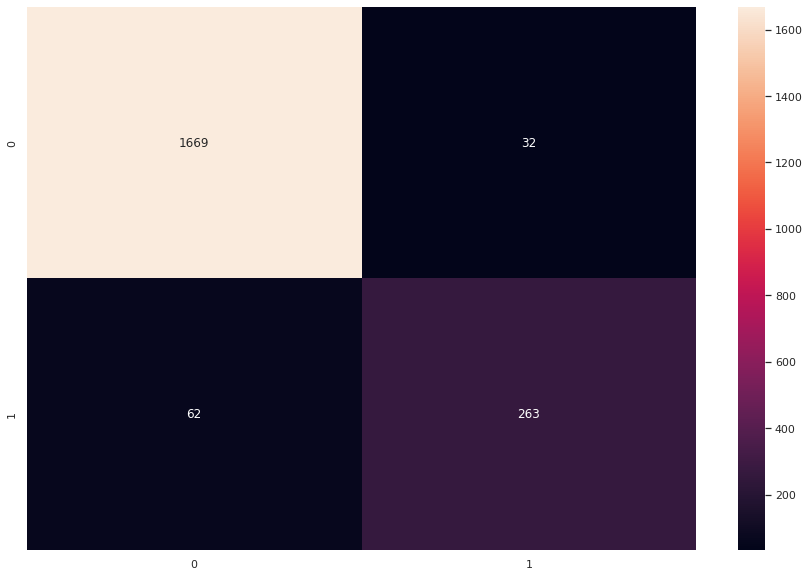

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='1');